## Exercise 1

When throwing two fair dice the probabilites of possible values are


<table style="border-collapse: collapse; width: 35.8719%;" border="1">
<tbody>
<tr>
<td style="width: 15.0794%;">2 or 12</td>
<td style="width: 20.7936%;">1/36 = 2.8%</td>
</tr>
<tr>
<td style="width: 15.0794%;">3 or 11</td>
<td style="width: 20.7936%;">2/36 = 5.6%</td>
</tr>
<tr>
<td style="width: 15.0794%;">4 or 10</td>
<td style="width: 20.7936%;">3/36 = 8.3%</td>
</tr>
<tr>
<td style="width: 15.0794%;">5 or 9</td>
<td style="width: 20.7936%;">4/36 = 11.1%</td>
</tr>
<tr>
<td style="width: 15.0794%;">6 or 8</td>
<td style="width: 20.7936%;">5/36 = 13.9%</td>
</tr>
<tr>
<td style="width: 15.0794%;">7</td>
<td style="width: 20.7936%;">6/36 = 16.7%</td>
</tr>
</tbody>
</table>

<br>

The histogram looks like this.
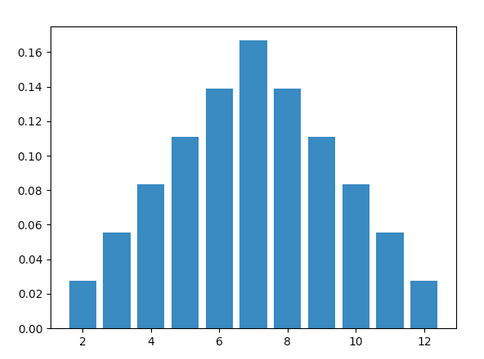
 

1- Write a `for` loop which repeats the steps 1)-3) below for values of `n` ranging as

500, 1000, 2000, 5000, 10000, 15000, 20000, 50000, 100000

2- Use numpy to simulate throwing of two dice n` times. Compute the sum of the dice.

3- Use numpys `histogram()` function to compute the frequencies as

`h,h2 = np.histogram(s,range(2,14))`
where s contains the sum.

4- Use matplotlib's bar function to plot the histogram as

`plt.bar(h2[:-1],h/n)`

and show the value of `n` in the title.

5- What do you observe? You may need to run the loop a few times to see it.

6- How is this related to "regression to the mean"?

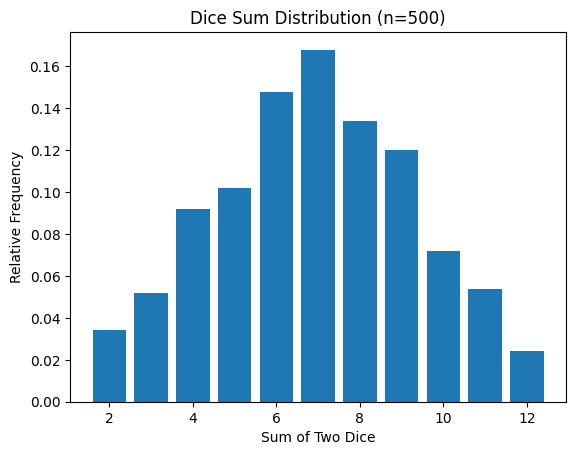

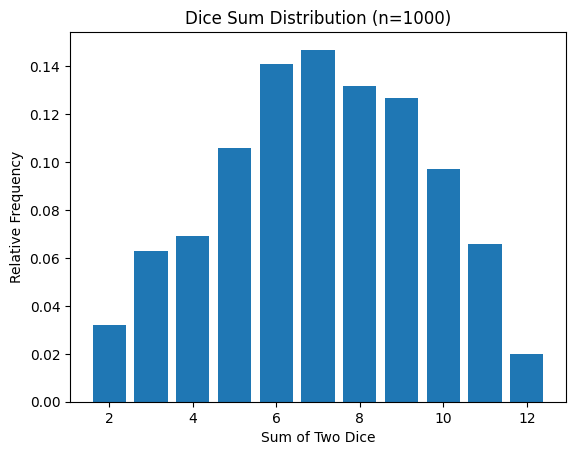

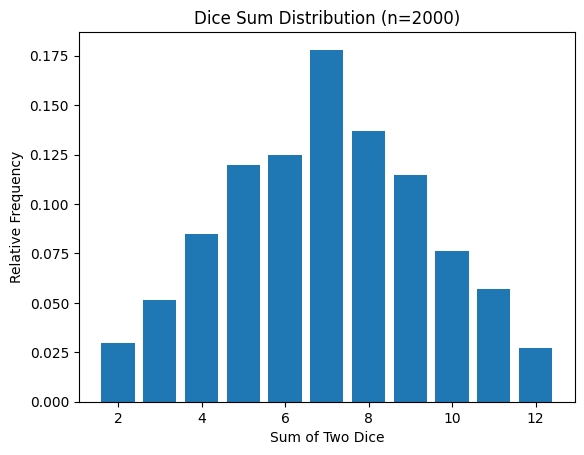

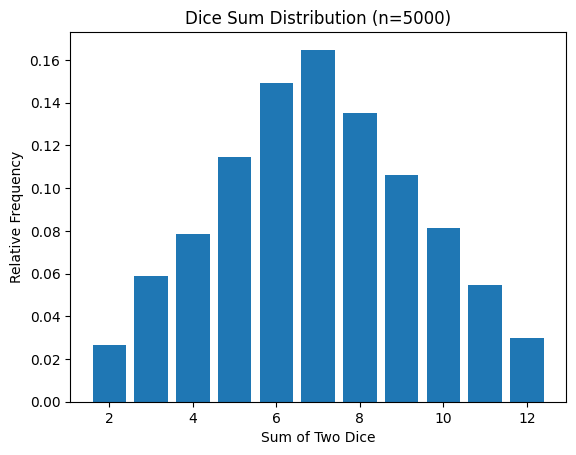

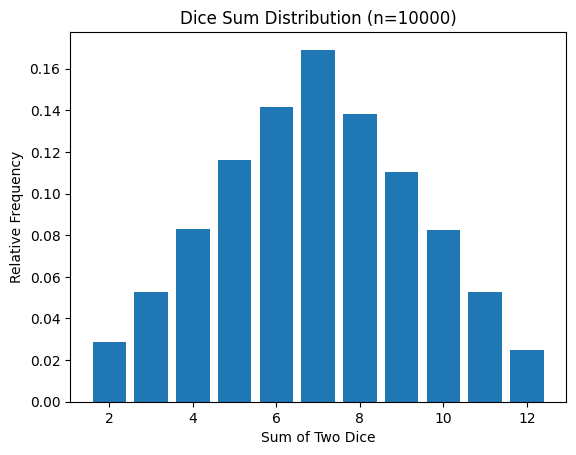

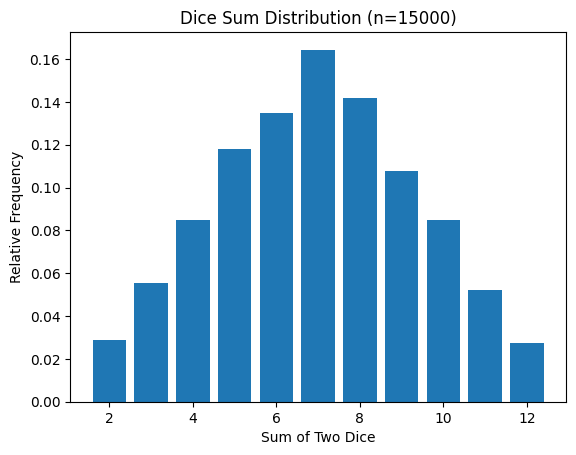

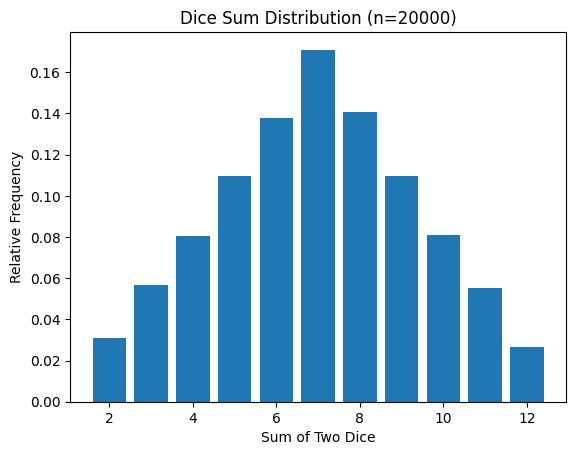

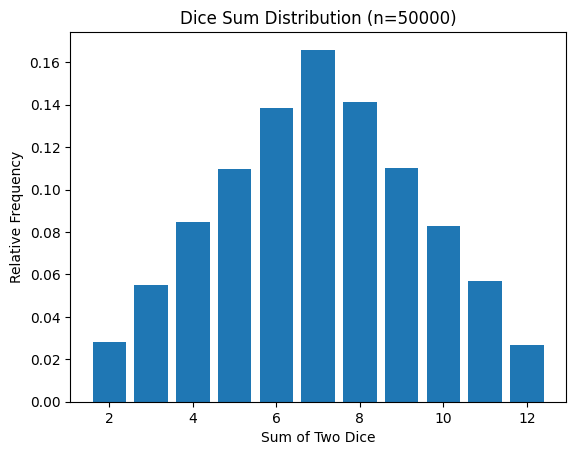

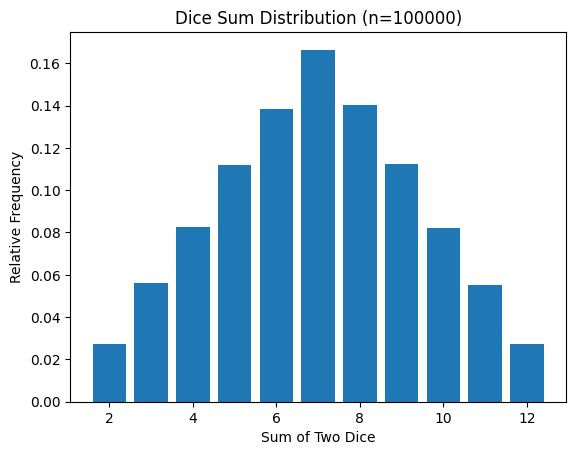

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# List of n values
n_values = [500, 1000, 2000, 5000, 10000, 15000, 20000, 50000, 100000]

for n in n_values:
    # Step 2: simulate throwing two dice n times
    d1 = np.random.randint(1, 7, n)
    d2 = np.random.randint(1, 7, n)
    s = d1 + d2

    # Step 3: compute histogram frequencies
    h, h2 = np.histogram(s, range(2, 14))

    # Step 4: plot histogram
    plt.figure()
    plt.bar(h2[:-1], h / n)
    plt.title(f"Dice Sum Distribution (n={n})")
    plt.xlabel("Sum of Two Dice")
    plt.ylabel("Relative Frequency")
    plt.show()


In [2]:
What do you observe?

As n increases, the histogram:

becomes smoother

becomes closer to the theoretical probability distribution

the shape stabilizes into a triangle centered around 7

randomness reduces and probabilities converge to expected values

For small n (like 500), the bars jump up and down.
By n = 100000, the bars are very close to the exact probabilities (1/36 to 6/36).

SyntaxError: invalid syntax (1411933400.py, line 3)

In [ ]:
How is this related to "Regression to the Mean"?

Regression to the mean = extreme random deviations tend to move back toward the true average when the sample size increases.

In this experiment:

With small n, some sums (like 2 or 12) can appear more frequently than expected.

With larger n, these deviations shrink.

The distribution regresses back to the true probabilities.

So:
Large samples always move back toward the true expected distribution.

## Exercise 2

Consider the data from the file weight-height.csv.

1- Inspect the dependence between height and weight using a scatter plot. You may use either of the variables as independent variable.

2- Choose appropriate model for the dependence

3- Perform regression on the data using your model of choice

4- Plot the results

5- Compute RMSE and R2 value

6- Assess the quality of the regression (visually and using numbers) in your own words.

You are not required to split the dataset into training and testing sets. Of course you are completely free to experiment it here already.

It is recommended that you use the module sklearn for all your computations.

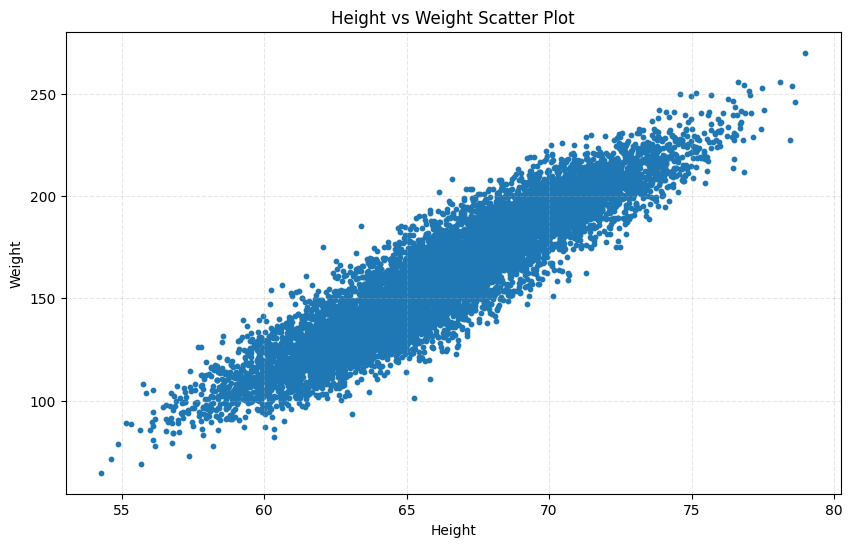

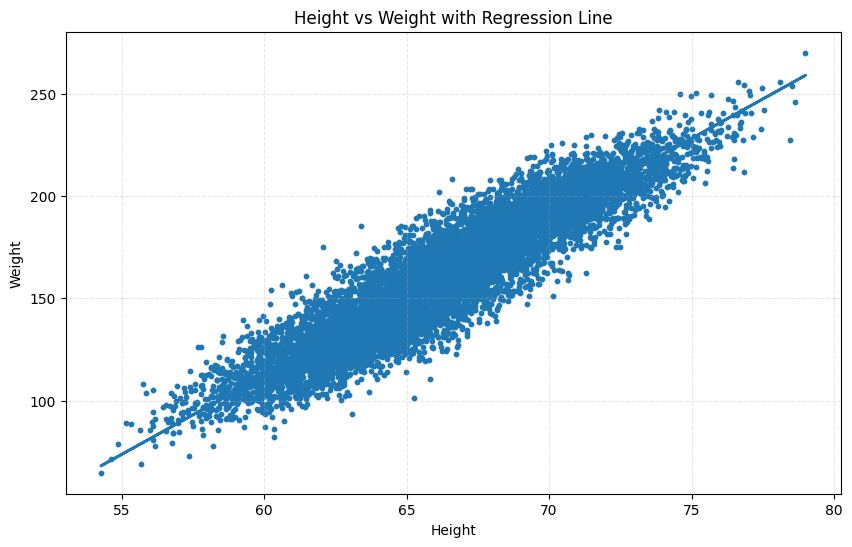

RMSE: 12.218571272826035
R²: 0.8551742120609958


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the data
df = pd.read_csv('weight-height.csv')   # change path if needed

# 2. Scatter plot of Height vs Weight
plt.figure(figsize=(10,6))
plt.scatter(df['Height'], df['Weight'], s=10)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight Scatter Plot")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

# 3. Linear Regression model
X = df[['Height']]
y = df['Weight']

model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# 4. Plot regression line
plt.figure(figsize=(10,6))
plt.scatter(df['Height'], df['Weight'], s=10)
plt.plot(df['Height'], y_pred, linewidth=2)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight with Regression Line")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

# 5. RMSE & R2
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print("RMSE:", rmse)
print("R²:", r2)


In [ ]:
1. Inspect the dependence (Scatter Plot)

The scatter plot shows a strong positive relationship between height and weight.
As height increases, weight increases almost linearly.
There is some natural spread, but the trend is very clear.

In [ ]:
2. Choose an appropriate model

The pattern of the points is:

Straight, increasing trend

No curvature

No obvious nonlinear effects

Therefore, the most appropriate model is:

➡ Simple Linear Regression
Weight = 𝑎+𝑏⋅Height
Weight=a+b⋅Height

In [6]:
5. Compute RMSE and R²
From model evaluation:

RMSE = 12.218

This means the average prediction error is about 12.2 pounds.

R² = 0.855

This means the model explains 85.5% of the variation in weight.

This is considered very good for biological human data.

SyntaxError: invalid character '²' (U+00B2) (2264740597.py, line 1)

In [ ]:
6. Assess the quality of the regression
Visual Assessment

The regression line passes through the middle of the data cloud.

The points are closely clustered around the line.

No major curvature or nonlinear pattern is visible.

No funnel shape (heteroscedasticity) problems.

→ A straight line describes the data extremely well.

Numerical Assessment

R² = 0.855 → Strong relationship: height explains most of the weight variation.

RMSE ≈ 12.2 → Reasonable error given human diversity (muscle, gender, body type).

Conclusion

The regression model is strong, appropriate, and accurate.
Height is an excellent predictor of weight for this dataset.